<a href="https://colab.research.google.com/github/dmod99/COVID19_Predict/blob/main/data_1b_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-1b(edited).csv")
df = df.sample(frac = 1,random_state=2)

In [ ]:
df['SARS-Cov-2_exam_result'].value_counts()

0    519
1     83
Name: SARS-Cov-2_exam_result, dtype: int64

In [ ]:
df.shape

(602, 20)

In [ ]:
#dropping id column as it is not a valid attribute to train model
#df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Patient_ID'], axis = 1)

In [ ]:
df
df_copy = pd.DataFrame().reindex_like(df)
print(df_copy)

     Patient_age_quantile  ...  SARS-Cov-2_exam_result
292                   NaN  ...                     NaN
141                   NaN  ...                     NaN
131                   NaN  ...                     NaN
453                   NaN  ...                     NaN
176                   NaN  ...                     NaN
134                   NaN  ...                     NaN
368                   NaN  ...                     NaN
152                   NaN  ...                     NaN
123                   NaN  ...                     NaN
563                   NaN  ...                     NaN
516                   NaN  ...                     NaN
67                    NaN  ...                     NaN
520                   NaN  ...                     NaN
65                    NaN  ...                     NaN
398                   NaN  ...                     NaN
577                   NaN  ...                     NaN
221                   NaN  ...                     NaN
307       

In [ ]:
df.isnull().any()

Patient_age_quantile                                False
Regular_Ward                                        False
Semi-ICU                                            False
ICU                                                 False
Hematocrit                                          False
Hemoglobin                                          False
Platelets                                           False
Mean_platelet_volume_                                True
Red_blood_Cells                                     False
Lymphocytes                                         False
Mean_corpuscular_hemoglobin_concentration (MCHC)    False
Leukocytes                                          False
Basophils                                           False
Mean_corpuscular_hemoglobin_(MCH)                   False
Eosinophils                                         False
Mean_corpuscular_volume_(MCV)                       False
Monocytes                                            True
Red_blood_cell

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(602, 19)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data.shape

(602, 19)

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8716216216216216
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.91      0.99      0.95        74
Covid Positive       0.83      0.42      0.56        12

      accuracy                           0.91        86
     macro avg       0.87      0.70      0.75        86
  weighted avg       0.90      0.91      0.89        86

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.93      0.98      0.95       445
Covid Positive       0.84      0.51      0.63        71

      accuracy                           0.92       516
     macro avg       0.88      0.75      0.79       516
  weighted avg       0.91      0.92      0.91       516



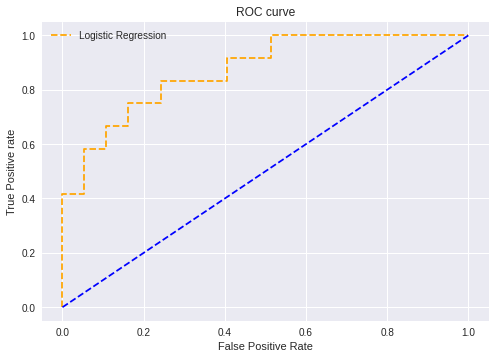

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:18])
                train_data_y.append(data_g[j][w][18])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:18])
                test_data_y.append(data_g[j][w][18])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve
    #train_data_x[["0_prediction","1_prediction"]] = pd.DataFrame(pred_prob1)
    #new_df_copy = pd.DataFrame(data=train_data_xn, columns=df_copy.columns)
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset1b-logistic-regression-test-results.csv")

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[73,  1],
       [ 7,  5]])

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.9069767441860465
Mean accuracy for train set =  0.9186046511627907


# **NAIVE BAYES**

0.793918918918919
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.94      0.86      0.90        74
Covid Positive       0.44      0.67      0.53        12

      accuracy                           0.84        86
     macro avg       0.69      0.77      0.72        86
  weighted avg       0.87      0.84      0.85        86



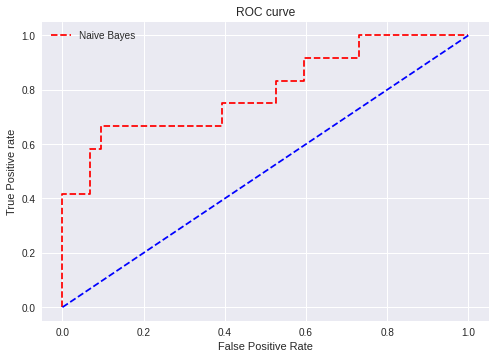

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:18])
                train_data_y.append(data_g[j][w][18])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:18])
                test_data_y.append(data_g[j][w][18])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)
  
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset1b-Naive-Bayes-test-results.csv")
    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.8372093023255814
Mean accuracy for train set =  0.8798449612403101


# ***Fisher Linear Discriminant***

0.8963963963963963
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.91      0.96      0.93        74
Covid Positive       0.62      0.42      0.50        12

      accuracy                           0.88        86
     macro avg       0.77      0.69      0.72        86
  weighted avg       0.87      0.88      0.87        86



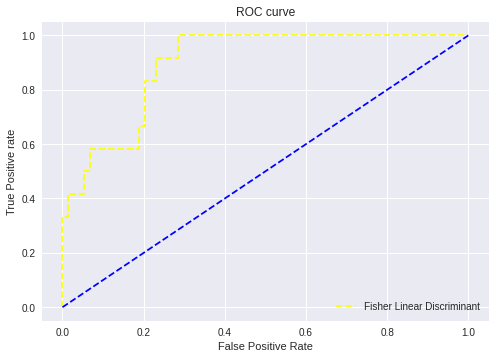

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:18])
                train_data_y.append(data_g[j][w][18])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:18])
                test_data_y.append(data_g[j][w][18])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    
    from sklearn.metrics import roc_curve
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset1b-Fisher-linear-discriminant-test-results.csv")
    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.8837209302325582
Mean accuracy for train set =  0.9031007751937985


# **KNN**

In [ ]:
df

,Patient_age_quantile,Regular_Ward,Semi-ICU,ICU,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),SARS-Cov-2_exam_result
292,17,0,0,0,0.534067,0.353596,-0.580222,0.459449,0.102004,0.147785,-0.552476,-0.261578,-0.834685,0.387261,-0.414114,0.706990,0.804021,-0.359703,0
141,2,0,0,0,-0.473031,-0.084996,1.203555,-0.550290,0.507502,1.060392,1.538664,-0.486984,0.692611,-1.076344,1.187183,-1.876823,-0.062665,-0.978899,0
131,1,0,0,1,-0.129702,-0.147652,0.600588,-1.447836,0.701437,-0.705120,-0.054585,-0.503681,0.387152,-1.494517,0.386534,-1.616438,-1.612194,-0.625073,0
453,18,0,0,1,-2.830554,-2.716547,-0.241053,1.244801,-2.948047,-1.865070,-0.353319,2.231804,-1.140144,1.014521,-0.414114,1.307876,-1.270772,4.947686,0
176,18,0,0,0,0.694287,0.980156,0.273981,0.683835,0.119635,0.309837,1.239930,-0.837616,1.303529,1.432694,8.350876,0.967375,-0.640455,-0.448160,0
134,18,1,0,0,0.488289,0.228284,0.085554,-0.774677,0.754327,2.024174,-0.851210,-0.692910,0.081693,-0.971801,0.007280,-0.655019,-0.272770,0.347948,0
368,9,0,0,0,-0.930802,-0.711556,0.537779,-0.550290,-1.237902,-1.182746,0.742040,0.634481,-0.834685,1.171335,-0.835508,0.947345,-1.480878,-0.890442,0
152,9,0,0,0,0.419624,0.165628,1.643218,-0.662483,0.754327,1.060392,-0.851210,-0.069565,-0.223767,-1.076344,-0.624811,-0.775198,-0.876824,0.436405,0
123,7,0,0,0,1.586941,1.606716,-0.052626,1.581381,2.023713,-0.150732,0.443306,0.038964,-0.529226,-0.762714,-0.161278,-1.075641,-0.246507,-0.182790,0
563,10,1,0,0,-0.679027,-0.648900,-0.178244,0.796029,-0.127191,0.113669,-0.054585,-0.528726,-0.529226,-0.971801,-0.751229,-1.075641,-0.088928,-0.182790,1


In [ ]:
y=df[['SARS-Cov-2_exam_result']] 
y

,SARS-Cov-2_exam_result
292,0
141,0
131,0
453,0
176,0
134,0
368,0
152,0
123,0
563,1


In [ ]:
x=df.drop(['SARS-Cov-2_exam_result'], axis = 1)
x

,Patient_age_quantile,Regular_Ward,Semi-ICU,ICU,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW)
292,17,0,0,0,0.534067,0.353596,-0.580222,0.459449,0.102004,0.147785,-0.552476,-0.261578,-0.834685,0.387261,-0.414114,0.706990,0.804021,-0.359703
141,2,0,0,0,-0.473031,-0.084996,1.203555,-0.550290,0.507502,1.060392,1.538664,-0.486984,0.692611,-1.076344,1.187183,-1.876823,-0.062665,-0.978899
131,1,0,0,1,-0.129702,-0.147652,0.600588,-1.447836,0.701437,-0.705120,-0.054585,-0.503681,0.387152,-1.494517,0.386534,-1.616438,-1.612194,-0.625073
453,18,0,0,1,-2.830554,-2.716547,-0.241053,1.244801,-2.948047,-1.865070,-0.353319,2.231804,-1.140144,1.014521,-0.414114,1.307876,-1.270772,4.947686
176,18,0,0,0,0.694287,0.980156,0.273981,0.683835,0.119635,0.309837,1.239930,-0.837616,1.303529,1.432694,8.350876,0.967375,-0.640455,-0.448160
134,18,1,0,0,0.488289,0.228284,0.085554,-0.774677,0.754327,2.024174,-0.851210,-0.692910,0.081693,-0.971801,0.007280,-0.655019,-0.272770,0.347948
368,9,0,0,0,-0.930802,-0.711556,0.537779,-0.550290,-1.237902,-1.182746,0.742040,0.634481,-0.834685,1.171335,-0.835508,0.947345,-1.480878,-0.890442
152,9,0,0,0,0.419624,0.165628,1.643218,-0.662483,0.754327,1.060392,-0.851210,-0.069565,-0.223767,-1.076344,-0.624811,-0.775198,-0.876824,0.436405
123,7,0,0,0,1.586941,1.606716,-0.052626,1.581381,2.023713,-0.150732,0.443306,0.038964,-0.529226,-0.762714,-0.161278,-1.075641,-0.246507,-0.182790
563,10,1,0,0,-0.679027,-0.648900,-0.178244,0.796029,-0.127191,0.113669,-0.054585,-0.528726,-0.529226,-0.971801,-0.751229,-1.075641,-0.088928,-0.182790


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[17.        ,  0.        ,  0.        , ...,  0.70698976,
         0.80402118, -0.35970309],
       [ 2.        ,  0.        ,  0.        , ..., -1.87682319,
        -0.06266452, -0.97889912],
       [ 1.        ,  0.        ,  0.        , ..., -1.61643839,
        -1.61219394, -0.62507266],
       ...,
       [19.        ,  0.        ,  0.        , ..., -1.27593648,
        -0.48287594,  3.09009934],
       [ 2.        ,  0.        ,  1.        , ..., -1.49626136,
         0.54138905, -0.97889912],
       [14.        ,  0.        ,  0.        , ...,  0.06604462,
         2.53739309, -0.80198544]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1b-KNN-test-results.csv")
    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.876984126984127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 91.80%
The Confusion Matrix is:
  [[54  0]
 [ 5  2]]
                precision    recall  f1-score   support

Covid Negative       0.92      1.00      0.96        54
Covid Positive       1.00      0.29      0.44         7

      accuracy                           0.92        61
     macro avg       0.96      0.64      0.70        61
  weighted avg       0.92      0.92      0.90        61



In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 0.9)
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.9, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 86.89%
The Confusion Matrix is:
  [[50  4]
 [ 4  3]]
                precision    recall  f1-score   support

Covid Negative       0.93      0.93      0.93        54
Covid Positive       0.43      0.43      0.43         7

      accuracy                           0.87        61
     macro avg       0.68      0.68      0.68        61
  weighted avg       0.87      0.87      0.87        61



In [ ]:
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1b-XGBoost-test-results.csv")
    # roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')


0.9365079365079365


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



Accuracy: 90.16%
The Confusion Matrix is:
  [[53  1]
 [ 5  2]]
                precision    recall  f1-score   support

Covid Negative       0.91      0.98      0.95        54
Covid Positive       0.67      0.29      0.40         7

      accuracy                           0.90        61
     macro avg       0.79      0.63      0.67        61
  weighted avg       0.89      0.90      0.88        61

0.9126984126984127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


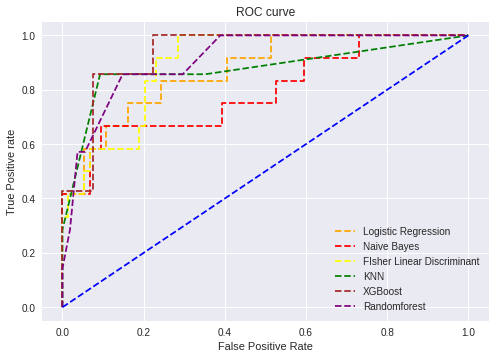

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
pred_prob1 = classifier.predict_proba(x_test)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1b-Randomforest-test-results.csv")
    # roc curve for models
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
classifier.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 95.08%
The Confusion Matrix is:
  [[52  2]
 [ 1  6]]
                precision    recall  f1-score   support

Covid Negative       0.98      0.96      0.97        54
Covid Positive       0.75      0.86      0.80         7

      accuracy                           0.95        61
     macro avg       0.87      0.91      0.89        61
  weighted avg       0.95      0.95      0.95        61

0.9021164021164021


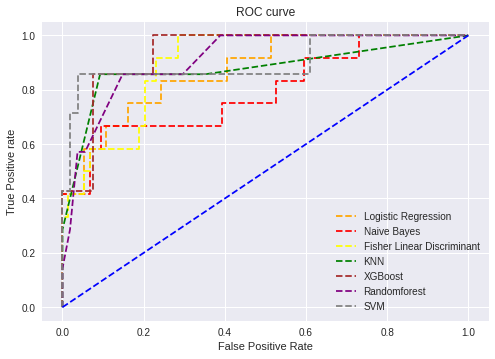

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1b-SVM-test-results.csv")
    # roc curve for models
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!pip3 install pandas_ml
!pip3 install scikit-learn==0.21
!pip3 install pandas==0.24.2

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


AUC Score is  0.876131221719457 

CONFUSION MATRIX -
 Predicted  False  True  __all__
Actual                         
False         97     7      104
True           4    13       17
__all__      101    20      121 

population: 121
P: 17
N: 104
PositiveTest: 20
NegativeTest: 101
TP: 13
TN: 97
FP: 7
FN: 4
TPR: 0.7647058823529411
TNR: 0.9326923076923077
PPV: 0.65
NPV: 0.9603960396039604
FPR: 0.0673076923076923
FDR: 0.35
FNR: 0.23529411764705882
ACC: 0.9090909090909091
F1_score: 0.7027027027027027
MCC: 0.6524485368445468
informedness: 0.6973981900452488
markedness: 0.6103960396039603
prevalence: 0.14049586776859505
LRP: 11.361344537815127
LRN: 0.25227410551849605
DOR: 45.03571428571429
FOR: 0.039603960396039604


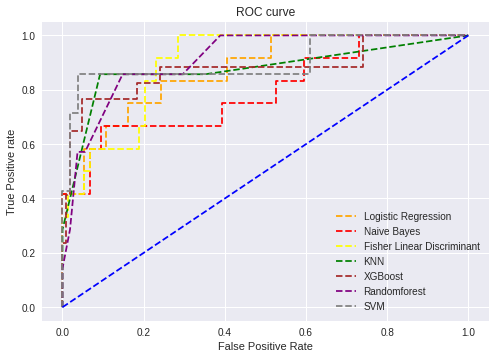

In [ ]:
from pandas_ml import ConfusionMatrix
dataset = pd.read_csv('/content/Dataset-1b(edited).csv')

total_neg_samples=sum(dataset['SARS-Cov-2_exam_result']==0)
total_pos_samples=sum(dataset['SARS-Cov-2_exam_result']==1)
scale_pos_weight = total_neg_samples / total_pos_samples

dataset.reset_index(inplace = True)

y = dataset[['SARS-Cov-2_exam_result']]

X = dataset
X.drop(labels=None, axis=1, columns=['SARS-Cov-2_exam_result','index','Patient_ID'], level=None, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, scale_pos_weight = scale_pos_weight)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
test_probs = model.predict_proba(X_test)
test_probs = test_probs[:, 1]
auc = roc_auc_score(y_test, test_probs)
print('AUC Score is ', (auc), '\n')
from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (121, 1))
new_np = np.hstack((X_test,arr_2d))
test_probs = np.reshape(test_probs,(121,1))
finaltocsv= np.hstack((new_np,test_probs))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset1b-XGBoost(Improved)-test-results.csv")
    # roc curve for models
fpr8, tpr8, thresh8 = roc_curve(y_test, test_probs, pos_label=1)
pred = pd.DataFrame(y_pred, columns=['SARS-Cov-2_exam_result'])
test = pd.DataFrame(y_test, columns=['SARS-Cov-2_exam_result'])
test.reset_index(inplace = True)
test.drop(labels=None, axis=1, columns=['index'], level=None, inplace=True)

CM = ConfusionMatrix(test['SARS-Cov-2_exam_result'], pred['SARS-Cov-2_exam_result'])

print('CONFUSION MATRIX -\n',(CM), '\n')
CM.print_stats()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();